# First Data Analysis DGFIP Request Data

## 1. Library import

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Data import

In [18]:
#Open data
df = pd.read_csv("work/diane_usage_daily_with_models_2026-01-28 (1).csv")
df

,Date,Team,Team ID,Model,Spend ($),Requests,Successful,Failed,Total Tokens
0,2025-10-02,Unassigned,Unassigned,Qwen2.5-Coder-32B-Instruct-fp8-W8A16,0.0006,8,8,0,624
1,2025-10-02,Unassigned,Unassigned,Mistral-Small-24B-Instruct-2501-FP8-dynamic,0.0006,8,8,0,624
2,2025-10-02,Unassigned,Unassigned,Llama-3-3-70B-128k,0.0006,8,8,0,624
3,2025-10-02,Unassigned,Unassigned,/model/deepdml-faster-whisper-large-v3-turbo-ct2,0.0006,8,8,0,624
4,2025-10-03,default_user_id,default_user_id,Mistral-Small-24B-Instruct-2501-FP8-dynamic,0.0004,4,4,0,396
...,...,...,...,...,...,...,...,...,...
158,2025-12-18,default_user_id,default_user_id,gte-Qwen2-1-5B-instruct,1.8688,497484,497484,0,1868804
159,2025-12-19,default_user_id,default_user_id,gte-Qwen2-1-5B-instruct,1.6403,416003,416003,0,1640256
160,2025-12-29,default_user_id,default_user_id,gte-Qwen2-1-5B-instruct,0.6564,166402,166402,0,656444
161,2025-12-30,default_user_id,default_user_id,gte-Qwen2-1-5B-instruct,1.3040,84712,84712,0,1303972


## 3. Data description / visualisation

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          163 non-null    object 
 1   Team          163 non-null    object 
 2   Team ID       163 non-null    object 
 3   Model         163 non-null    object 
 4   Spend ($)     163 non-null    float64
 5   Requests      163 non-null    int64  
 6   Successful    163 non-null    int64  
 7   Failed        163 non-null    int64  
 8   Total Tokens  163 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 11.6+ KB


,Spend ($),Requests,Successful,Failed,Total Tokens
count,163.000000,163.000000,163.000000,163.0,1.630000e+02
mean,8.021929,14935.993865,14935.993865,0.0,8.021925e+06
std,18.743915,57061.615246,57061.615246,0.0,1.874391e+07
min,0.000000,1.000000,1.000000,0.0,9.000000e+00
25%,0.000600,7.000000,7.000000,0.0,6.240000e+02
50%,1.868800,504.000000,504.000000,0.0,1.868804e+06
75%,6.815000,6524.000000,6524.000000,0.0,6.814998e+06
max,93.349500,497484.000000,497484.000000,0.0,9.334945e+07


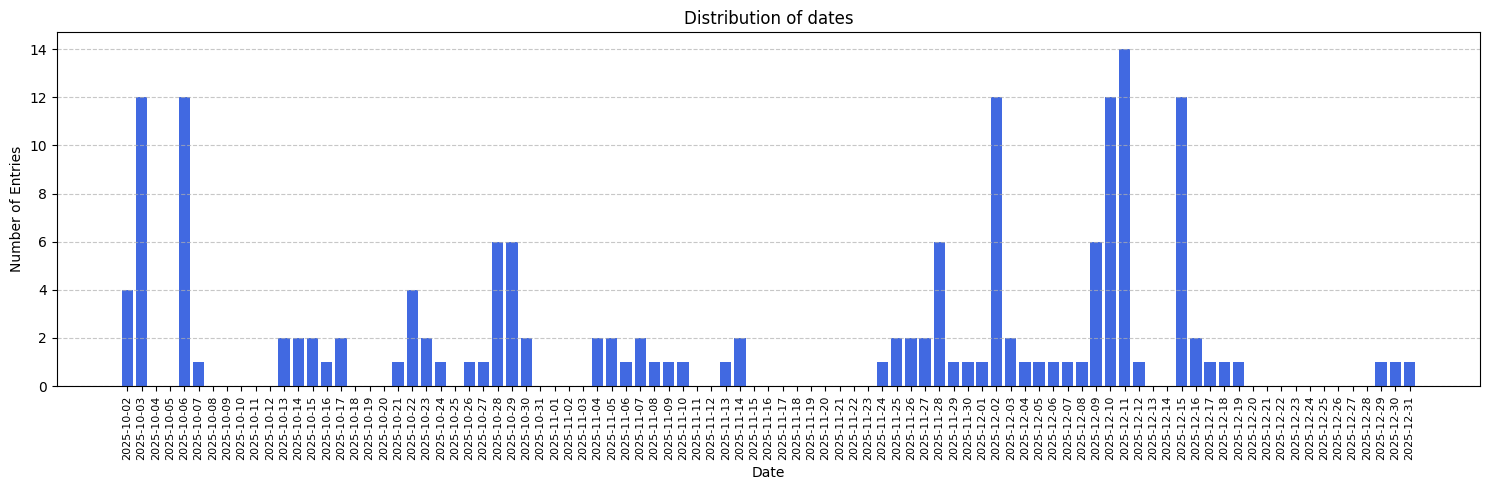

In [23]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
date_counts = df['Date'].value_counts().sort_index()
all_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
full_series = date_counts.reindex(all_dates, fill_value=0)

plt.figure(figsize=(15, 5))
plt.bar(full_series.index, full_series.values, width=0.8, color='royalblue')

plt.title("Distribution of dates")
plt.xlabel("Date")
plt.ylabel("Number of Entries")
plt.xticks(all_dates, [d.strftime('%Y-%m-%d') for d in all_dates], rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

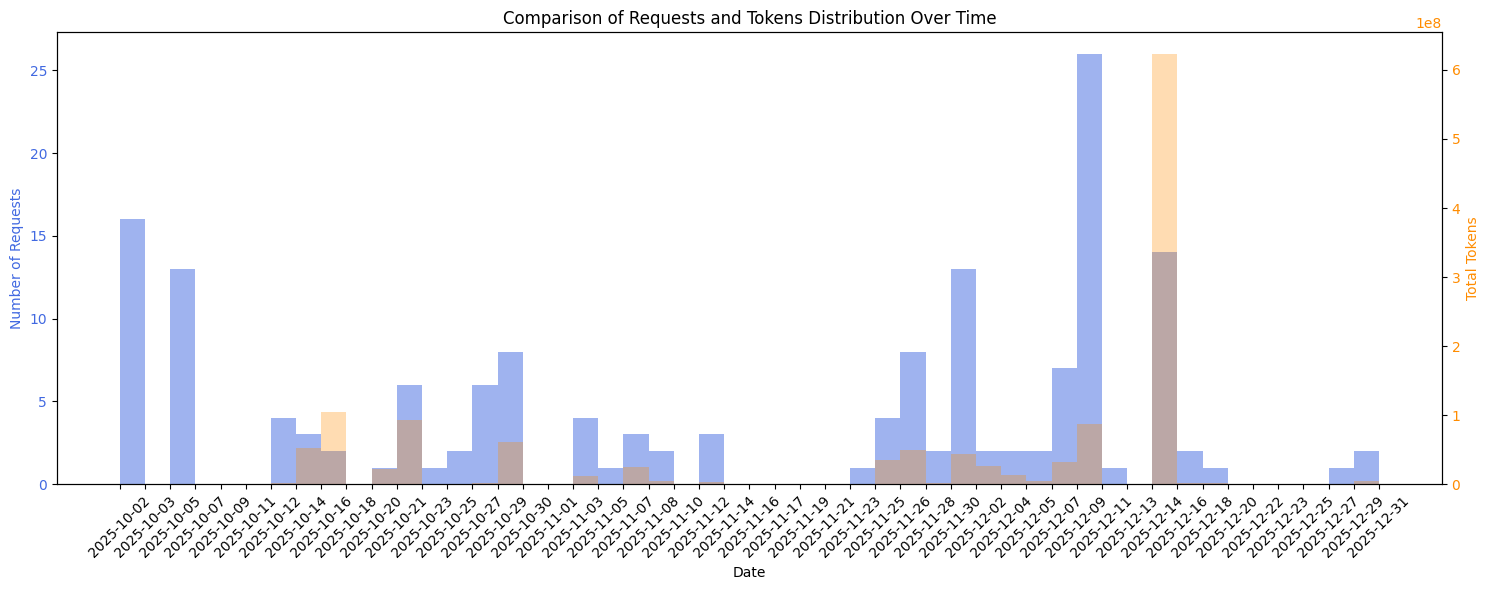

In [21]:
#Distrubution of requests and tokens over time
df['Date'] = pd.to_datetime(df['Date'])
fig, ax1 = plt.subplots(figsize=(15, 6))

#Requests
n, bins, patches = ax1.hist(df['Date'], bins=50, color='royalblue', alpha=0.5, label="Number of Requests")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Requests', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

#Tokens
ax2 = ax1.twinx() 
ax2.hist(df['Date'], bins=bins, weights=df['Total Tokens'], color='darkorange', alpha=0.3, label="Total Tokens")
ax2.set_ylabel('Total Tokens', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title("Comparison of Requests and Tokens Distribution Over Time")
ax1.set_xticks(bins) 
ax1.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

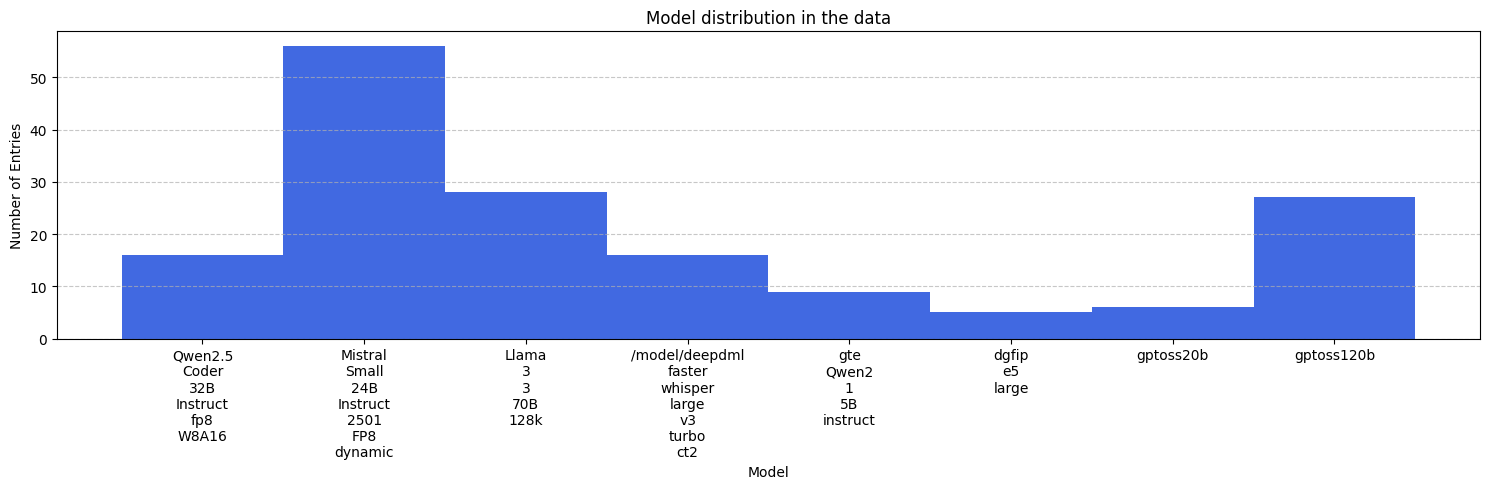

In [22]:
# Model distribution

model_counts = df['Model'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.bar(df['Model'].unique(), model_counts, width=1.0, color='royalblue')
plt.title("Model distribution in the data")
plt.xlabel("Model")
plt.ylabel("Number of Entries")

labels = [name.replace('-', '\n') for name in df['Model'].unique()]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()